In [1]:
import networkx as nx
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from node2vec import Node2Vec

In [2]:
G= nx.read_gml('lesmiserables.gml',label='id') #reading the input graph  

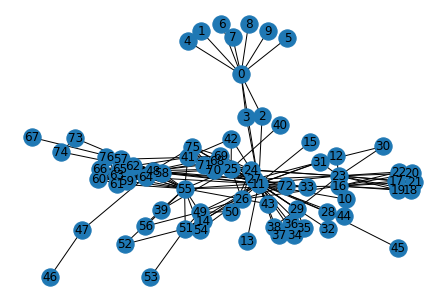

In [3]:
nx.draw(G, with_labels=True,) # drawing the graph
plt.show()

In [4]:
df_edges=nx.to_pandas_edgelist(G)  #creating an edge list data frame
df_edges

,source,target,value
0,0,1,1
1,0,2,8
2,0,3,10
3,0,4,1
4,0,5,1
...,...,...,...
249,69,75,3
250,70,71,2
251,70,75,1
252,71,75,1


In [5]:
node2vec = Node2Vec(G, dimensions=16, walk_length=30, num_walks=200, workers=4,q=2)  #  Precompute probabilities and generate walks

Computing transition probabilities: 100%|██████████| 77/77 [00:00<00:00, 1920.67it/s]


In [6]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # embed nodes

In [7]:
model.wv.save_word2vec_format('./lesmis.emb')

In [8]:
lesmiserables_df= pd.read_csv('lesmis.emb',sep=' ',skiprows=[0],header=None) # creating a dataframe from the embedded graph 
lesmiserables_df.set_index(0,inplace=True)
lesmiserables_df.index.name='node_id'
lesmiserables_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
node_id,,,,,,,,,,,,,,,,
11,0.101068,0.115078,0.007429,-1.925191,0.617581,-1.391916,-0.610519,-2.087136,0.602713,-0.368966,-0.875131,0.024938,0.023042,-1.734813,2.999030,0.678560
48,0.572073,-0.291357,-1.633076,1.443980,0.554083,0.467075,-2.775526,-0.436229,0.355745,0.316768,1.788762,0.013957,-0.095742,2.649172,-0.895031,0.355941
55,-0.492216,0.325824,-0.318623,-0.054647,0.288159,-0.285075,-0.297841,0.940442,-0.222661,3.028377,-0.089033,-2.168784,-2.211752,0.369028,-0.470081,-2.596415
27,0.374452,0.165160,0.543938,-0.915822,-1.649160,-1.290219,-0.328571,-0.100025,1.030543,1.814797,0.307665,1.693942,0.467572,0.206046,2.664463,2.362331
0,-2.103986,-0.388260,1.344181,-1.030542,3.720143,-0.473325,2.394681,-2.084035,-0.733236,-2.917049,-4.395063,1.029945,-0.160562,-0.143571,0.003830,-0.309746


In [9]:
NUM_CLUSTERS = 3                           # running Machine learning cluster algorithm(Kmeans) on the embedded graph
km = KMeans(n_clusters=NUM_CLUSTERS)
labels = km.fit_predict(lesmiserables_df)
lesmiserables_df['cluster']=labels

In [10]:
clusters_df = lesmiserables_df.reset_index()[['node_id','cluster']]  #creating a cluster data frame that contains cluster id for each node
clusters_df

,node_id,cluster
0,11,2
1,48,0
2,55,0
3,27,0
4,0,2
...,...,...
72,14,2
73,15,2
74,53,0
75,40,0


In [11]:
labels=dict(G.nodes.data())          #creating a dictionary to bind node id to its label
names=[]
for item in list(labels.values()):
    names.append(item['label'])

In [12]:
id_names_dict = {key: value for key, value in zip(range(len(G.nodes)), names)}

In [13]:
with open('lesmiserables1.gdf', 'w') as f:                        # prepare the output graph to be read by the Gephi tool 
    f.write('nodedef>name VARCHAR,cluster_id VARCHAR,label VARCHAR\n')
    for index, row in clusters_df.iterrows():
        f.write('{},{},{}\n'.format(row['node_id'], row['cluster'],id_names_dict[row[0]]))
    f.write('edgedef>node1 VARCHAR,node2 VARCHAR,weight VARCHAR\n')
    for index, row in df_edges.iterrows(): 
        f.write('{},{},{}\n'.format(row['source'], row['target'],row['value']))